In [1]:
import numpy as np

prob_succ_gen = 1
prob_succ_swap = 1
prob_swap = 0.2
time_cutoff = 7
qubits_per_node = 2*time_cutoff # Represents an infinite memory

time = 1000000
max_swap_dist = 4
number_of_nodes = 2*(max_swap_dist + 1) + 1
test = False

virtual_node_degree = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Node/virtual_node_degree.npy')
virtual_neighbourhood_size = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Node/virtual_neighbourhood_size.npy')

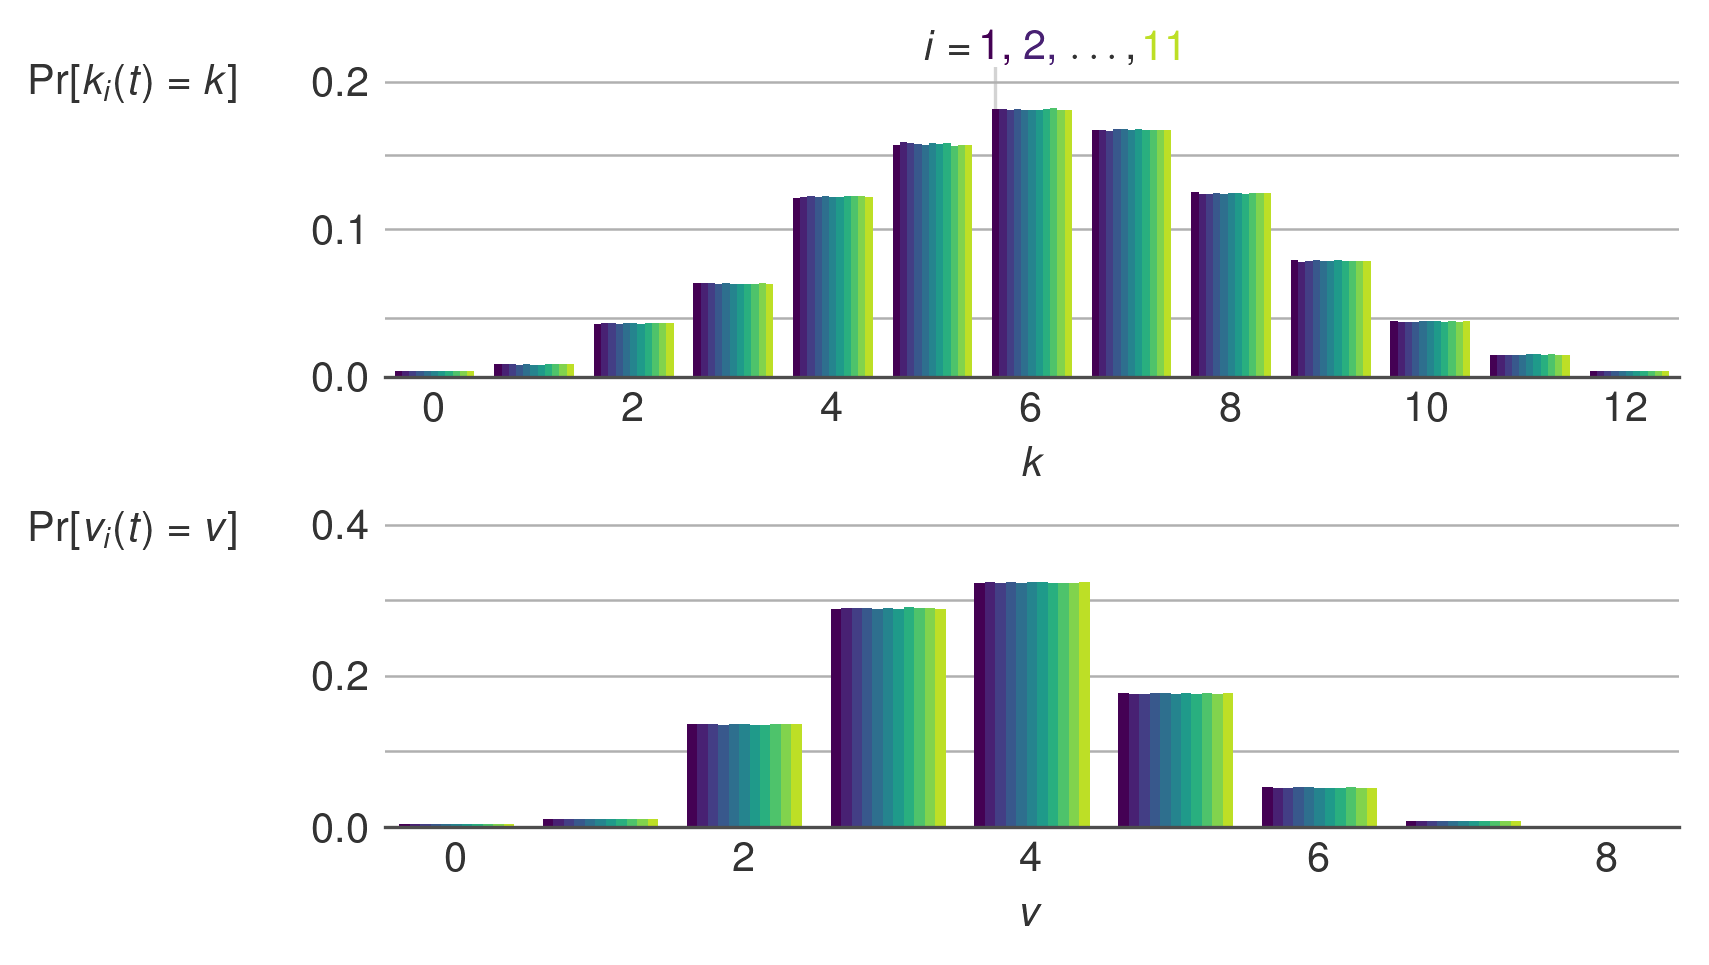

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from itertools import product

plt.style.use('FOLDER_LOCATION/figure.mplstyle')
color_text = (0, 0, 0, 0.8)


cart_prod_node_indices = product(np.arange(0, number_of_nodes), 
                                 np.arange(0, 1))

virtual_node_degree_linearized = np.empty((number_of_nodes, time))
virtual_neighbourhood_size_linearized = np.empty((number_of_nodes, time))

for i, j in cart_prod_node_indices:
    virtual_node_degree_linearized[i, :] = virtual_node_degree[i, j, :]
    virtual_neighbourhood_size_linearized[i, :] = virtual_neighbourhood_size[i, j, :]

colors = plt.cm.viridis(np.linspace(0, 0.9, number_of_nodes))

mm = 1/25.4
fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=[157.5*mm*0.9, 157.5*mm/16*7])

ax[0].plot([5.63, 5.63], [0.15,0.21], color='lightgray', linewidth=0.8, zorder=-10)
ax[0].text(5.4, 0.215, r'$i=$', ha='right', color=color_text, fontsize=10)
ax[0].text(5.85, 0.215, r'$1,$', ha='right', color=colors[0], fontsize=10)
ax[0].text(6.27, 0.215, r'$2,$', ha='right', color=colors[1], fontsize=10)
ax[0].text(7.07, 0.215, r'$\dots,$', ha='right', color=color_text, fontsize=10)
ax[0].text(7.6, 0.215, r'$11$', ha='right', color=colors[10], fontsize=10)


ax[0].hist(np.transpose(virtual_node_degree_linearized[:, 2*time_cutoff:]), bins=np.arange(np.amin(virtual_node_degree_linearized)-1,np.amax(virtual_node_degree_linearized)+1)+0.5, histtype='bar', color=colors, density=True, label=np.arange(1,number_of_nodes**2+1))

ax[0].set_ylabel(r'$\Pr [k_i(t)=k]$', rotation=0, y=0.88, labelpad = 17, ha='right')
ax[0].set_xlabel(r'$k$')
ax[0].set_xlim(0-1/2, 12+1/2)
ax[0].set_ylim(0, 0.21)
ax[0].spines['left'].set_visible(False)

ax[0].tick_params(axis='both', which='both', direction='out', size = 0)
ax[0].set_xticks([0, 2, 4, 6, 8, 10, 12])
ax[0].set_yticks([0, 0.1, 0.2])
ax[0].set_yticks([0.04, 0.15], minor=True)
ax[0].tick_params(axis='x', direction='out', which='both')

ax[0].grid(axis='y', which='both', linewidth=0.6)
ax[0].set_axisbelow(True)


ax[1].grid(axis='y', which='both', linewidth=0.6)
ax[1].set_axisbelow(True)

ax[1].hist(np.transpose(virtual_neighbourhood_size_linearized[:, 2*time_cutoff:]), bins=np.arange(np.amin(virtual_neighbourhood_size_linearized)-1,np.amax(virtual_neighbourhood_size_linearized)+1)+0.5, histtype='bar', color=colors, density=True)
ax[1].set_ylabel(r'$\Pr[v_i(t)=v]$', rotation=0, y=0.89, labelpad = 17, ha='right')
ax[1].set_xlabel(r'$v$')
ax[1].set_xlim(0-1/2, 8+1/2)
ax[1].set_ylim(0, 0.41)

ax[1].spines['left'].set_visible(False)

ax[1].tick_params(axis='both', which='both', direction='out', size = 0)
ax[1].set_xticks([0, 2, 4, 6, 8])
ax[1].set_yticks([0, 0.2, 0.4])
ax[1].set_yticks([0.1, 0.3], minor=True)

fig.set_facecolor('white')
# fig.savefig('FOLDER_LOCATION/infinite networks/node_convergence.pdf', bbox_inches = 'tight', pad_inches=0*mm)